# Cardiovascular Disease Classification Analysis

### 1. Library Imports

In [89]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Load the CSV Data

In [90]:
df = pd.read_csv('./data/cardio_train.csv', delimiter=';')


# I. Business Understanding (10 points) | David

_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._



# II.  Data Meaning Type (10 points) | Daniel

_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._

From the data description of the Kaggle competition.  

* https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

There are 3 types of input features in the data set.
- Objective: factual information
- Examination:  results from a medical examination
- Subjective:  response provided by patient


| Column Description | Feature Type | Column Name | Data Type |
|-------------|--------------|-------------|-----------|
| Age                        | Objective | age | int (days) |
| Height                     | Objective | height | int (cm) |
| Weight                     | Objective | weight | float (kg) |
| Gender                     | Objective | gender | categorical code |
| Systolic blood pressure    | Examination | ap_hi | int |
| Diastolic blood pressure   | Examination | ap_lo | int |
| Cholesterol                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking                    | Subjective | smoke | binary |
| Alcohol intake             | Subjective | alco | binary |
| Physical activity          | Subjective | active | binary |
| Has CVD?                   | Target | cardio | binary |

In [91]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Let's use the `id` column as the index as it appears to be a unique identifier for the subject.

In [92]:
df.set_index("id", inplace=True)

In [93]:
df.index.is_unique

True

### Identify Dimensions

In [94]:
df.shape

(70000, 12)

`70K` rows and `12` columns

Store columns for later use.

In [95]:
cols = df.columns

In [96]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# III. Data Quality (15 points) | Chance

_Explain any missing values, duplicate data, and outliers.  Are those mistakes? How do you deal with these problems? Give justifications for your methods._

## Missing Values

There are no missing values in any of the columns of the default data frame after having removed the unique ID column.

In [97]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

## Duplicates

There do appear to be missing values.

In [98]:
df.duplicated().any() 


True

In [99]:
df.duplicated().sum()

24

In [100]:
df[df.duplicated(keep=False)].sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio']).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9004,14552,1,158,64.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
24435,16160,1,168,65.0,120,80,1,1,0,0,1,1
91592,16160,1,168,65.0,120,80,1,1,0,0,1,1
1685,16793,1,165,68.0,120,80,1,1,0,0,1,0


## Outliers

# IV. Simple Statistics (10) | Shane 

_Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful._

In [101]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# V. Visualize Attributes (15) | TEAM (DECIDE ON 5)

_Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate._Visualize_

In [102]:
### 6. Example Plot from Competition Kernel

In [103]:
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 11, 8
# df['years'] = (df['age'] / 365).round().astype('int')
# sns.countplot(x='years', hue='cardio', data = df);

Text(0, 0.5, 'Frequency')

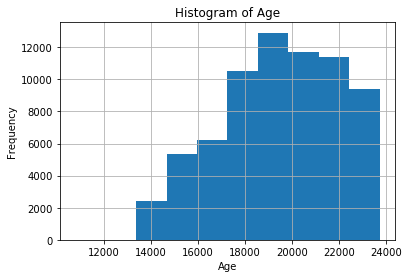

In [104]:
df["age"].hist()
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

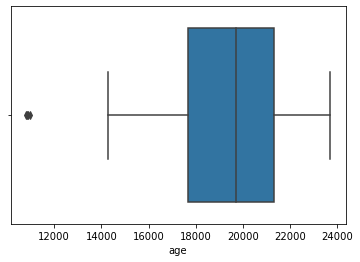

In [105]:
sns.boxplot(x=df["age"])

Text(0, 0.5, 'Frequency')

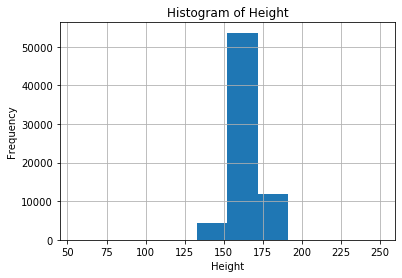

In [106]:
df["height"].hist()
plt.title("Histogram of Height")
plt.xlabel("Height")
plt.ylabel("Frequency")

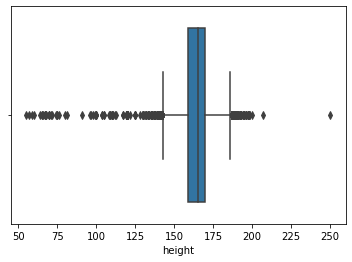

In [107]:
sns.boxplot(x=df["height"])


Text(0, 0.5, 'Frequency')

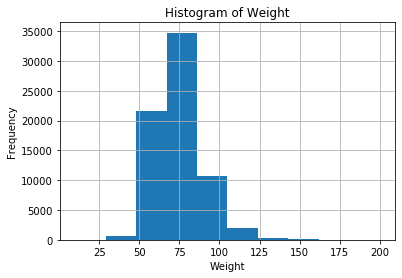

In [108]:
df["weight"].hist()
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")

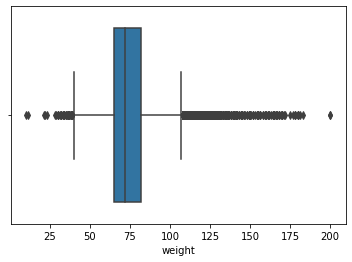

In [109]:
sns.boxplot(x=df["weight"])

Text(0, 0.5, 'Frequency')

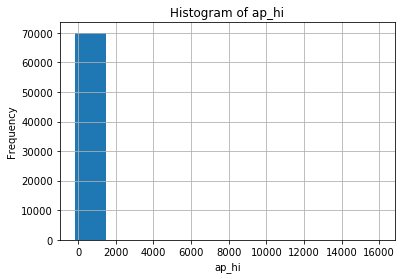

In [110]:
df["ap_hi"].hist()
plt.title("Histogram of ap_hi")
plt.xlabel("ap_hi")
plt.ylabel("Frequency")

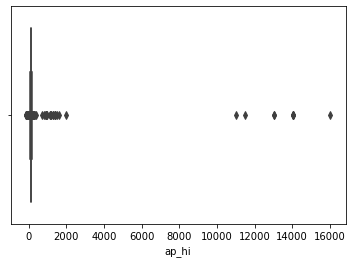

In [111]:
sns.boxplot(x=df["ap_hi"])

In [112]:
df["ap_hi"].sample(10)

id
12732    120
40643    120
74173    130
21317    120
22065    140
93015    120
59840    120
98833    100
58636    120
33104    120
Name: ap_hi, dtype: int64

In [113]:
df["ap_hi"].sort_values()

id
50055     -150
34295     -140
66571     -120
36025     -120
22881     -115
         ...  
67502    14020
36339    14020
36414    14020
66998    14020
58374    16020
Name: ap_hi, Length: 70000, dtype: int64

Text(0, 0.5, 'Frequency')

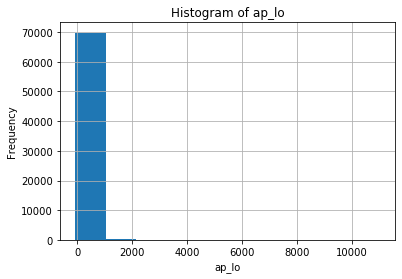

In [114]:
df["ap_lo"].hist()
plt.title("Histogram of ap_lo")
plt.xlabel("ap_lo")
plt.ylabel("Frequency")

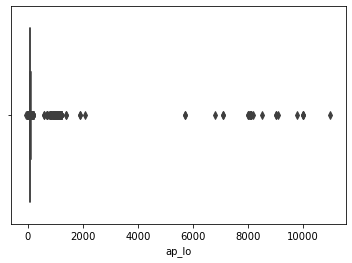

In [115]:
sns.boxplot(x=df["ap_lo"])

In [116]:
df["ap_lo"].sample(10)


id
90824    80
70616    80
8197     80
74618    80
21988    90
87179    80
55571    80
30537    80
3266     80
75262    80
Name: ap_lo, dtype: int64

In [117]:
df["ap_lo"].sort_values()

id
85816      -70
57646        0
60565        0
81298        0
91073        0
         ...  
62058     9800
97907    10000
34098    10000
3352     10000
61901    11000
Name: ap_lo, Length: 70000, dtype: int64

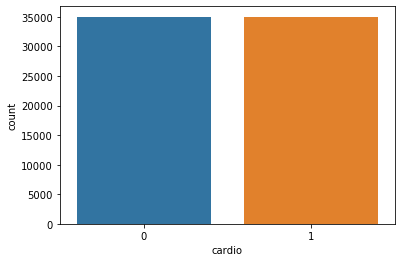

In [118]:
sns.countplot(x="cardio", data=df)

Text(0.5, 1.0, 'CVD by Cholesterol Level')

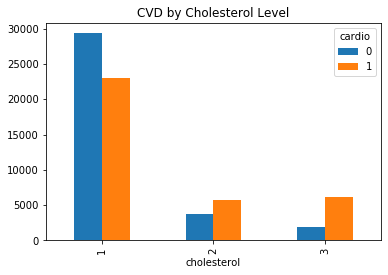

In [119]:
pd.crosstab(df["cholesterol"], df["cardio"]).plot(kind="bar")
plt.title("CVD by Cholesterol Level")

Text(0.5, 1.0, 'CVD by Glucose Level')

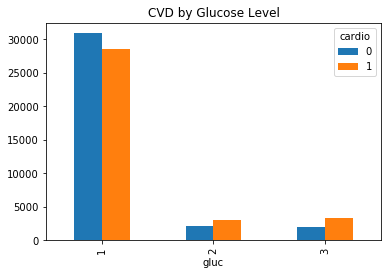

In [120]:
pd.crosstab(df["gluc"], df["cardio"]).plot(kind="bar")
plt.title("CVD by Glucose Level")

Text(0.5, 1.0, 'CVD by Smoking Level')

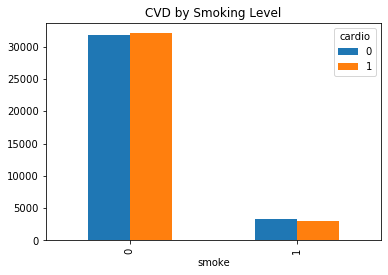

In [121]:
pd.crosstab(df["smoke"], df["cardio"]).plot(kind="bar")
plt.title("CVD by Smoking Level")

Text(0.5, 1.0, 'CVD by Alchohol Level')

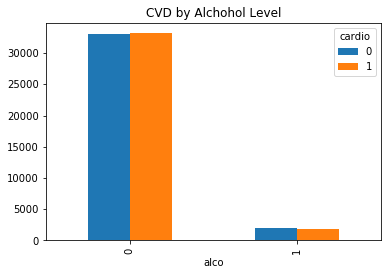

In [122]:
pd.crosstab(df["alco"], df["cardio"]).plot(kind="bar")
plt.title("CVD by Alchohol Level")

Text(0.5, 1.0, 'CVD by Activity Level')

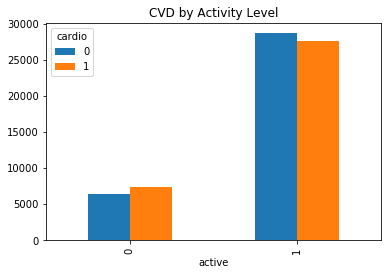

In [123]:
pd.crosstab(df["active"], df["cardio"]).plot(kind="bar")
plt.title("CVD by Activity Level")

# VI. Explore Joint Attributes (15) | weight/ height - BMI | Daniel

_Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships._

In [124]:
# %%time
# sns.pairplot(df.sample(5))
# sns.pairplot(df)
# plt.savefig('pair_plot.png')
# plt.show()

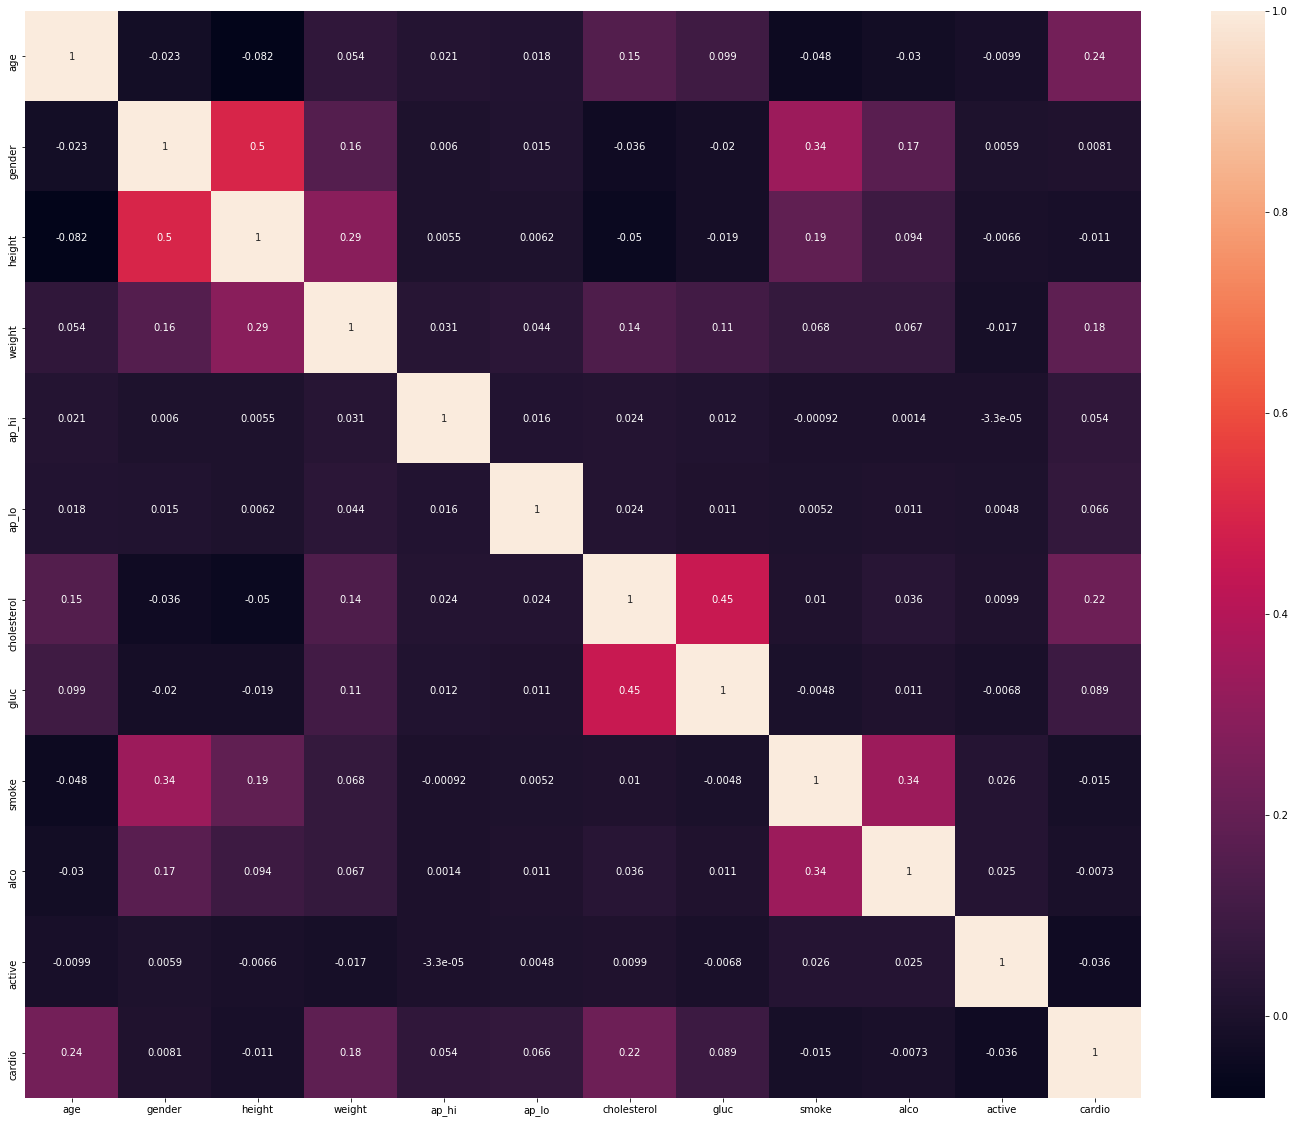

In [125]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot = True)

# VII. Explore Attributes and Class (10) | David

_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._

# VIII. New Features (5) - Daniel

_Are there other features that could be added to the data or created from existing features? Which ones?_

# IX. Exceptional Work (10) | (TEAM)

_You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results._

### Store feature matrix as an ndarray

In [126]:
x_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df[x_cols].to_numpy()

In [127]:
type(X)

numpy.ndarray

### Store response vector

In [128]:
y = df['cardio'].to_numpy()

In [129]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
y_pred = logreg.predict(X_test)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the log reg model on the test data: 0.69


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7745 2794]
 [3613 6848]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.68      0.73      0.71     10539
           1       0.71      0.65      0.68     10461

    accuracy                           0.69     21000
   macro avg       0.70      0.69      0.69     21000
weighted avg       0.70      0.69      0.69     21000

